In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ito_diffusion_1d import *
from ito_diffusion_multi_d import *
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
T = 1
SCHEME_STEPS = int(1e4)
LEGEND_SIZE = 32
FONT_SIZE = 32

## Brownian motion, with and without drift

$dX_t = \mu dt + \sigma dW_t$

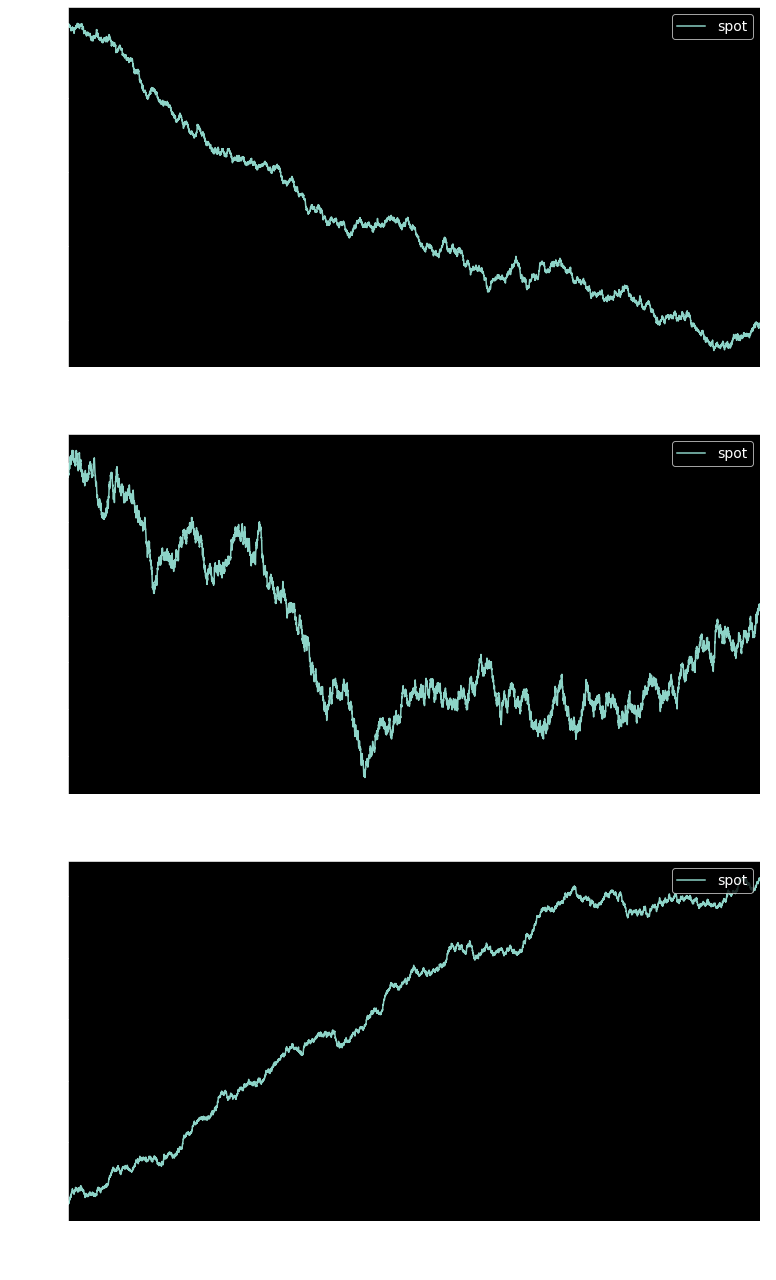

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = BM(x0=0, T=T, scheme_steps=SCHEME_STEPS, vol=1)

for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()

plt.show()

## Brownian motion, with absorption at zero

$dX_t = \mu dt + \sigma dW_t$

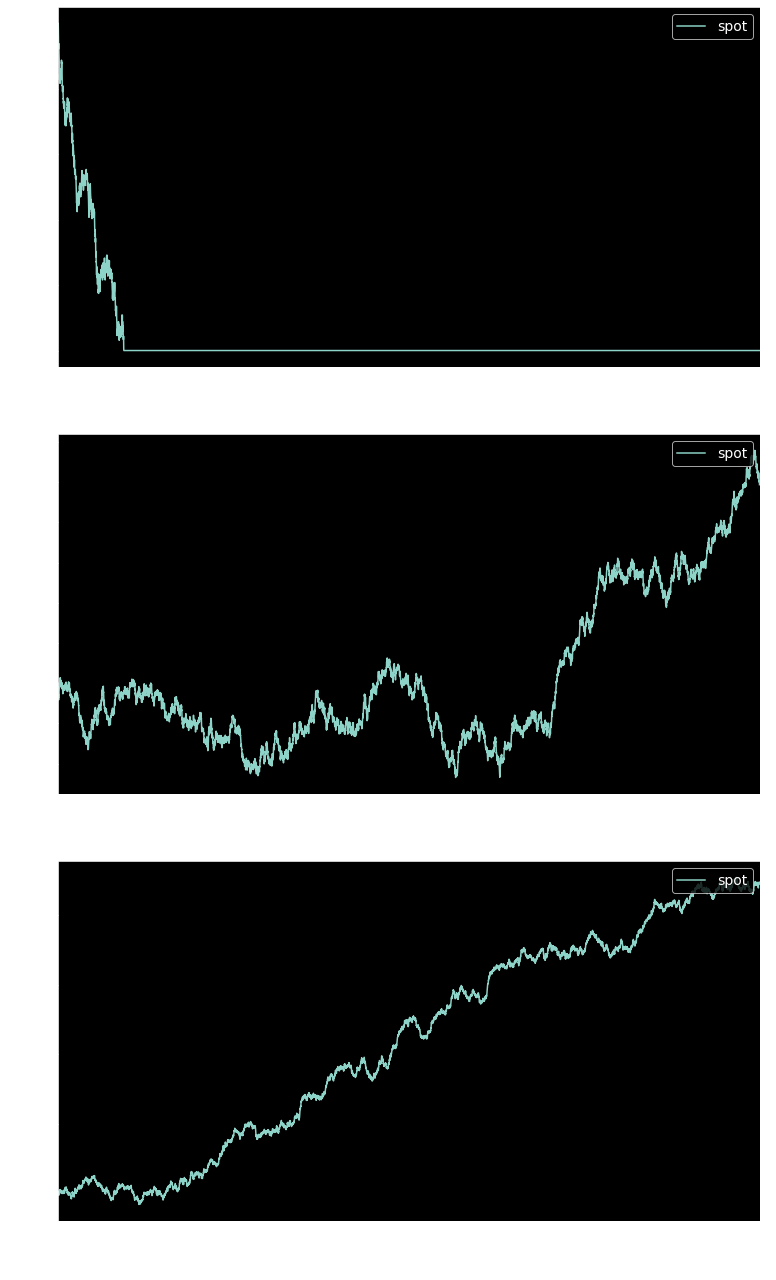

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = BM(x0=1, T=T, scheme_steps=SCHEME_STEPS, vol=1,\
          barrier=0, barrier_condition='absorb')
    
for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()

plt.show()

## Geometric Brownian motion, with and without drift

$dX_t = \mu X_t dt + \sigma X_t dW_t$

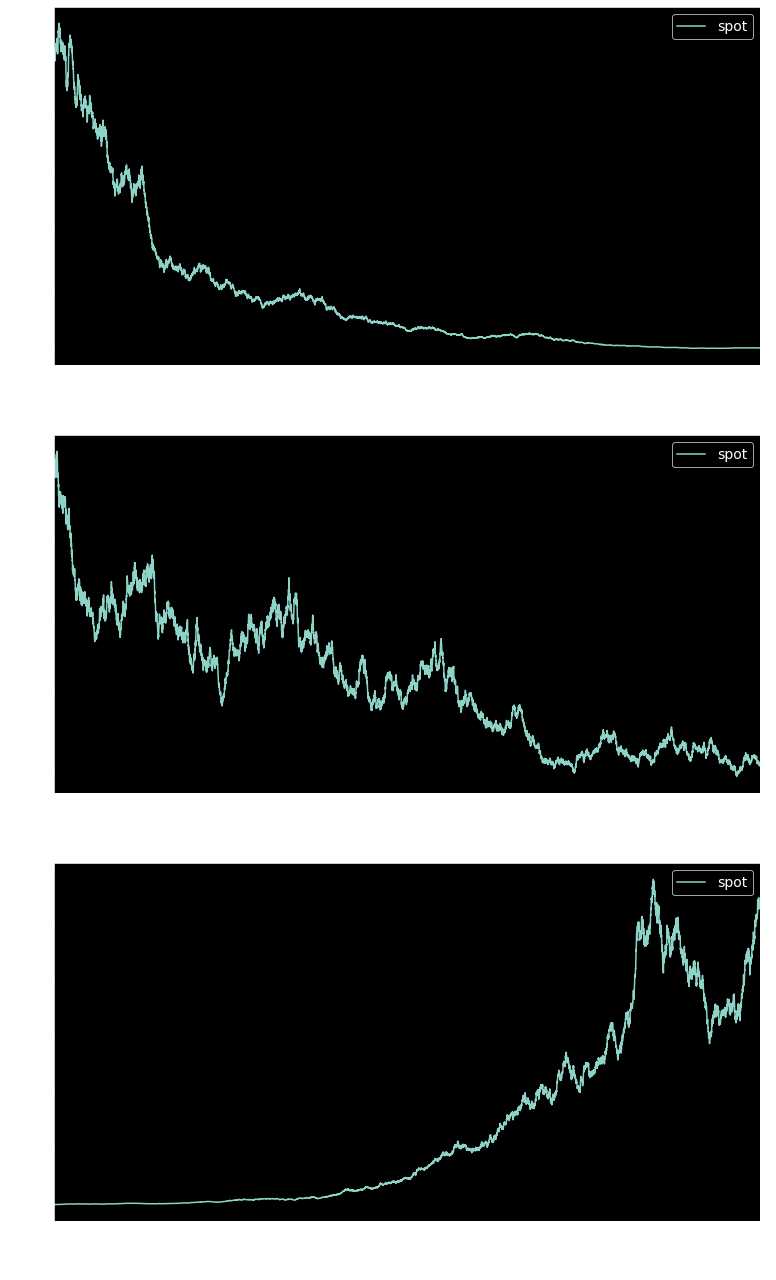

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = GBM(x0=1, T=T, scheme_steps=SCHEME_STEPS, vol=1)

for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Pair of correlated Brownian motions


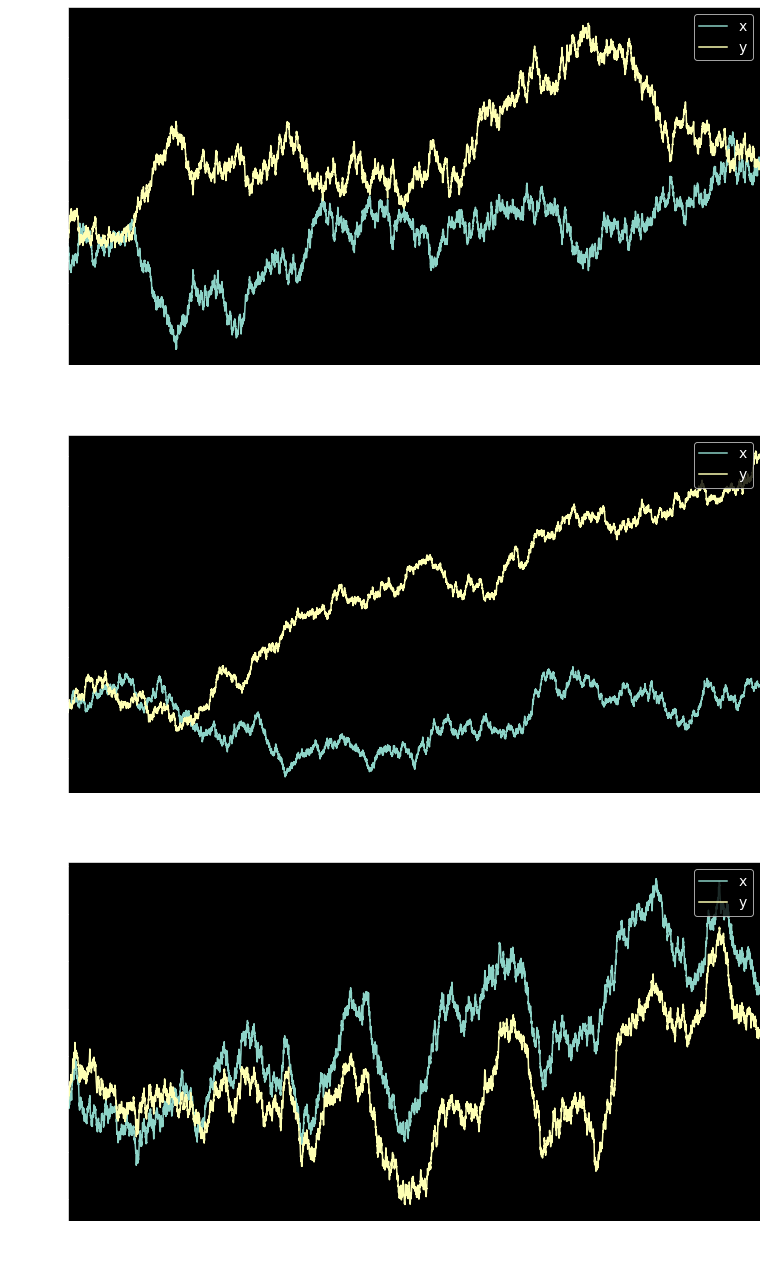

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1)

x0 = [0,0]
drift = [0,0]
rhos = [-0.5, 0, 0.5]

X = BM_multi_d(x0=x0, T=T, drift=drift, vol=np.eye(2),\
                   scheme_steps=SCHEME_STEPS, keys=['x', 'y'])

for i, ax in enumerate(axes):
    rho = rhos[i]
    vol = [[1,rho],[rho,1]]    
    X.vol_matrix = vol
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrho={:.0%}'.format(rho))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

## Pair of correlated Brownian motions with absorption along different coordinates

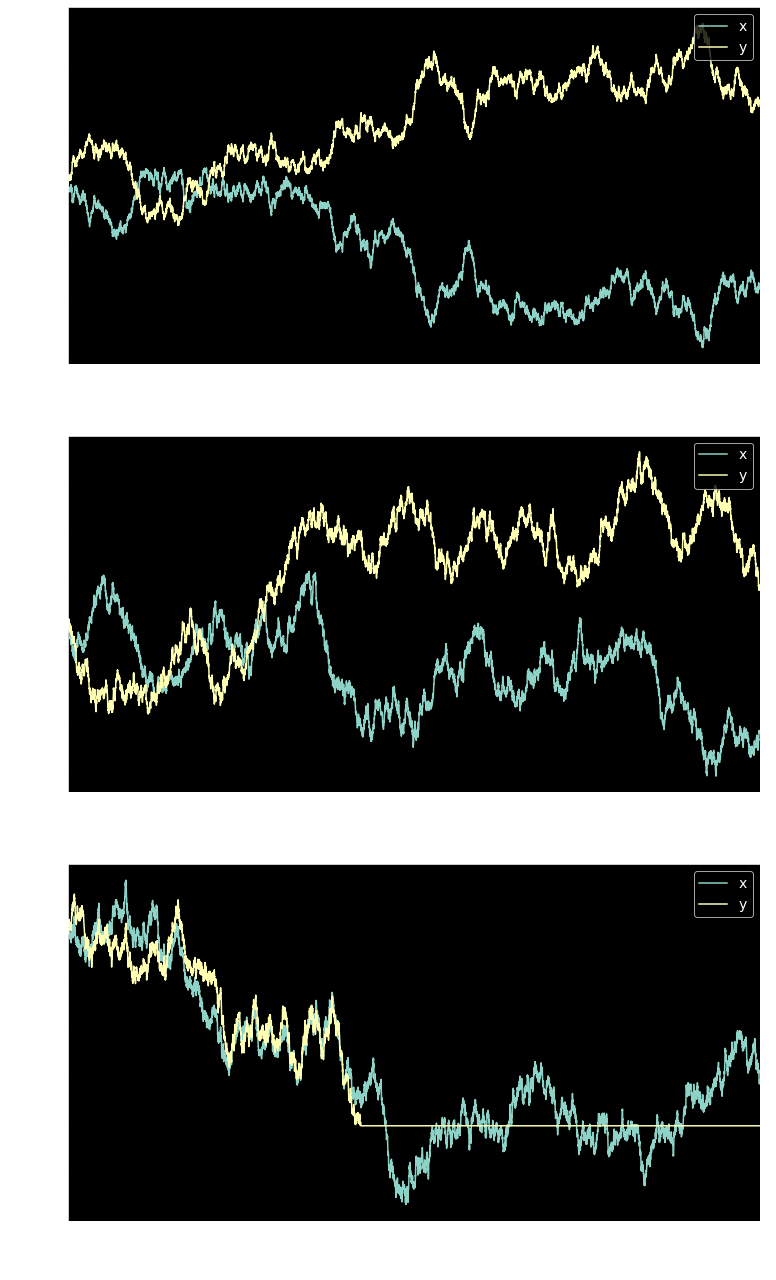

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1)

x0 = [0,0]
drift = [0,0]
rhos = [-0.5, 0, 0.5]

X = BM_multi_d(x0=x0, T=T, scheme_steps=SCHEME_STEPS, vol=np.eye(2),\
                   keys=['x', 'y'], barrier=[1, -1], barrier_condition='absorb')

for i, ax in enumerate(axes):
    rho = rhos[i]
    vol = [[1,rho],[rho,1]]    
    X.vol_matrix = vol
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrho={:.0%}'.format(rho))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Pair of correlated geometric Brownian motions

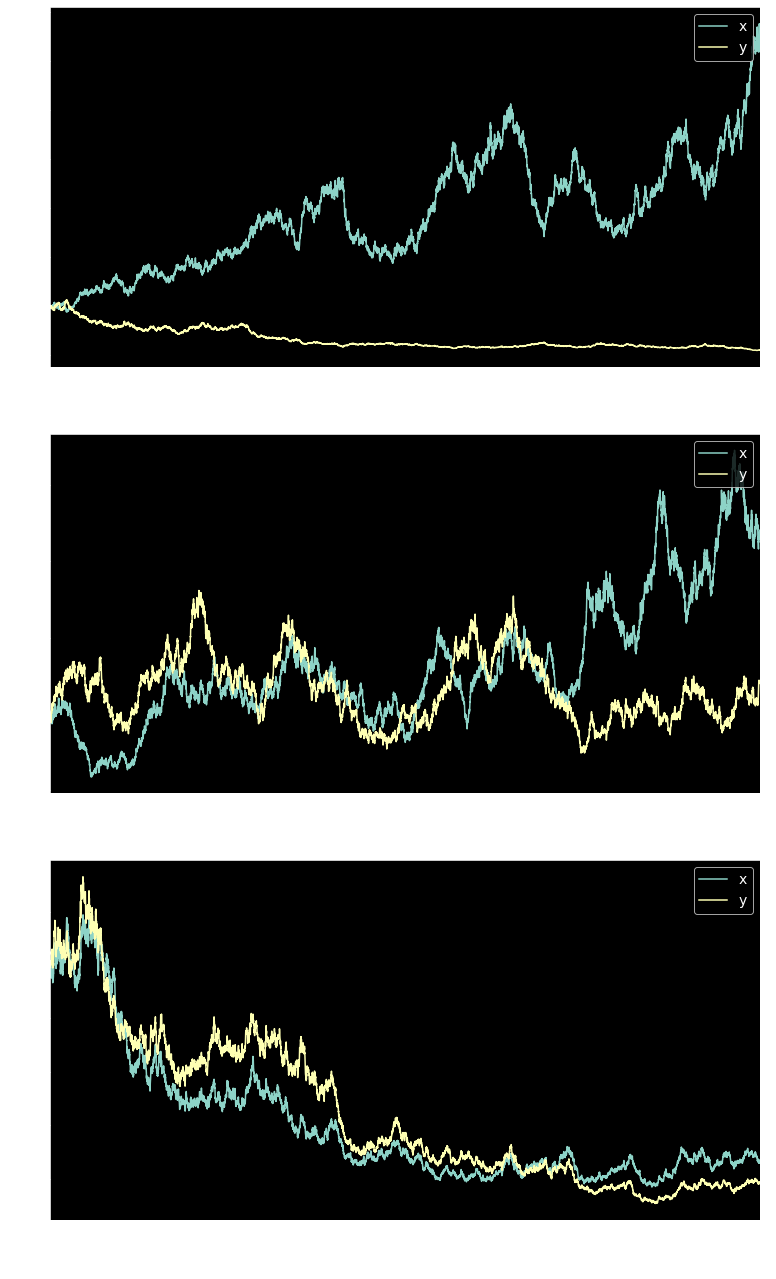

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1)

x0 = [1,1]
drift = [0,0]
rhos = [-0.5, 0, 0.5]

X = GBM_multi_d(x0=x0, T=T, vol=np.eye(2), scheme_steps=SCHEME_STEPS, keys=['x', 'y'])

for i, ax in enumerate(axes):
    rho = rhos[i]
    vol = [[1,rho],[rho,1]]    
    X.vol_matrix = vol
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\nrho={:.0%}'.format(rho))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

## Stochastic vol diffusion (SABR) sample paths

$dX_t = \sigma_t X_t^{\beta} dW_t$

$d\sigma_t = \epsilon \sigma_t dB_t$

$d<W, B>_t = \rho dt$

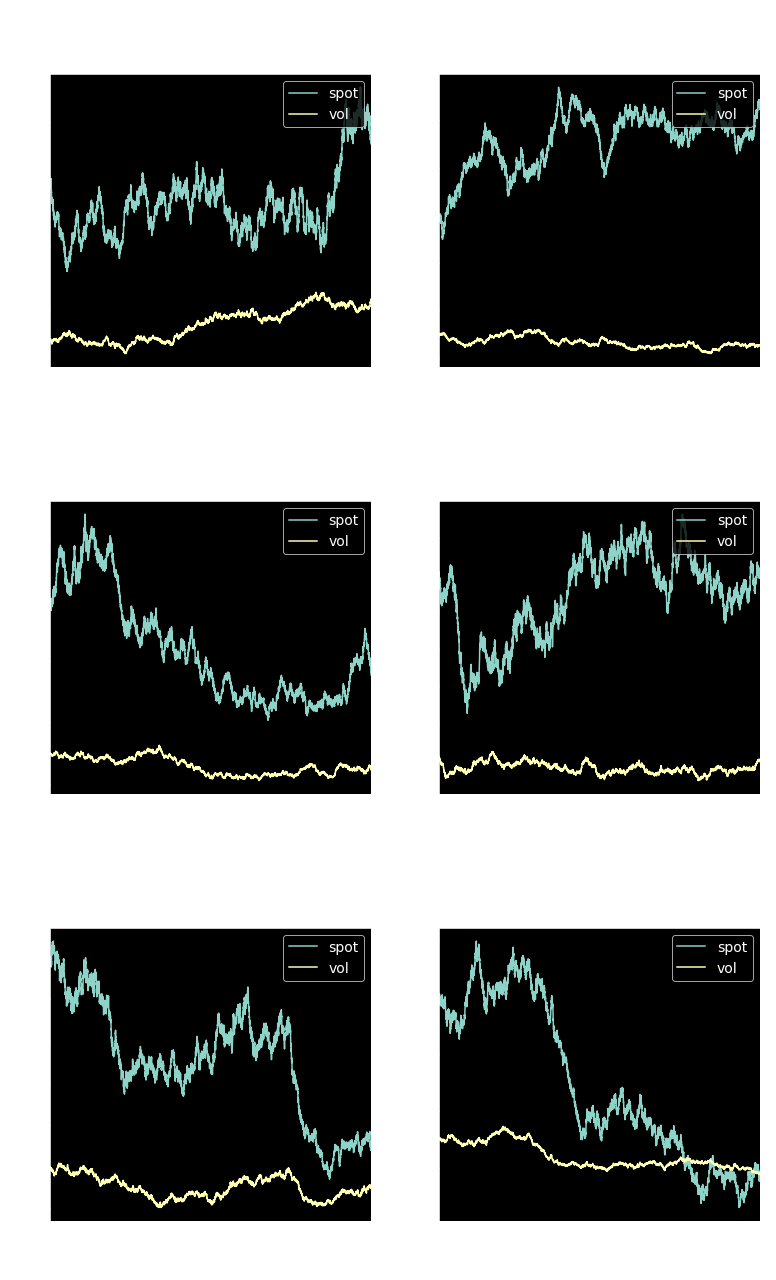

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2)

x0 = [1, 0.5]

params = [
    [1.0, 0.2, -0.5],
    [1.0, 0.2, 0.0],
    [1.0, 0.2, 0.5],
    [0.0, 0.2, -0.5],
    [0.0, 0.2, 0.0],
    [0.0, 0.2, 0.5],
]


X = SABR(x0=x0, T=T, scheme_steps=SCHEME_STEPS, keys=['spot', 'vol'])
    
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        beta = params[i+3*j][0]
        vov = params[i+3*j][1]
        rho = params[i+3*j][2]
        X.beta = beta
        X.vov = vov
        X.rho = rho
        
        df = X.simulate()
        df.plot(kind='line', ax=ax)

        ax.set_xlabel('time\n')
        ax.set_ylabel('spot')
        ax.legend(loc='upper right') 
        ax.set_title(r'$\beta$={:.2}'.format(beta)+'\n'\
                     r'vov={:.0%}'.format(vov)+'\n'\
                     r'$\rho$={:.0%}'.format(rho),\
                     )
plt.tight_layout()
plt.show()

## Stochastic vol diffusion (SABR) sample paths with absorption

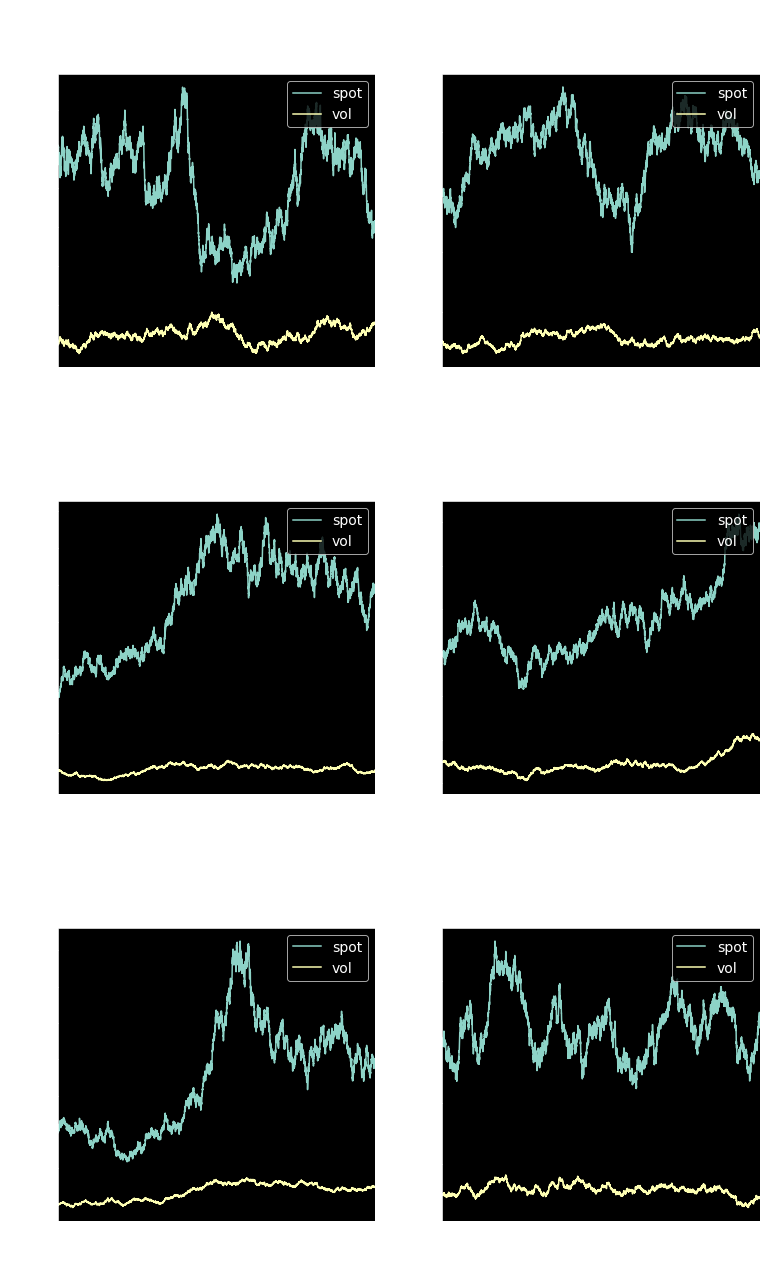

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2)

x0 = [1, 0.5]

params = [
    [1.0, 0.2, -0.5],
    [1.0, 0.2, 0.0],
    [1.0, 0.2, 0.5],
    [0.0, 0.2, -0.5],
    [0.0, 0.2, 0.0],
    [0.0, 0.2, 0.5],
]

X = SABR(x0=x0, T=T, scheme_steps=SCHEME_STEPS, keys=['spot', 'vol'],\
             barrier=[0.5, None], barrier_condition='absorb')

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        beta = params[i+3*j][0]
        vov = params[i+3*j][1]
        rho = params[i+3*j][2]
        X.beta = beta
        X.vov = vov
        X.rho = rho

        df = X.simulate()
        df.plot(kind='line', ax=ax)

        ax.set_xlabel('time\n')
        ax.set_ylabel('spot')
        ax.legend(loc='upper right') 
        ax.set_title(r'$\beta$={:.2}'.format(beta)+'\n'\
                     r'vov={:.0%}'.format(vov)+'\n'\
                     r'$\rho$={:.0%}'.format(rho),\
                     )
plt.tight_layout()
plt.show()

## Pseudo Geometric Brownian motion
With increasing volatility

$dX_t = \mu dt + \sigma X_t dW_t$

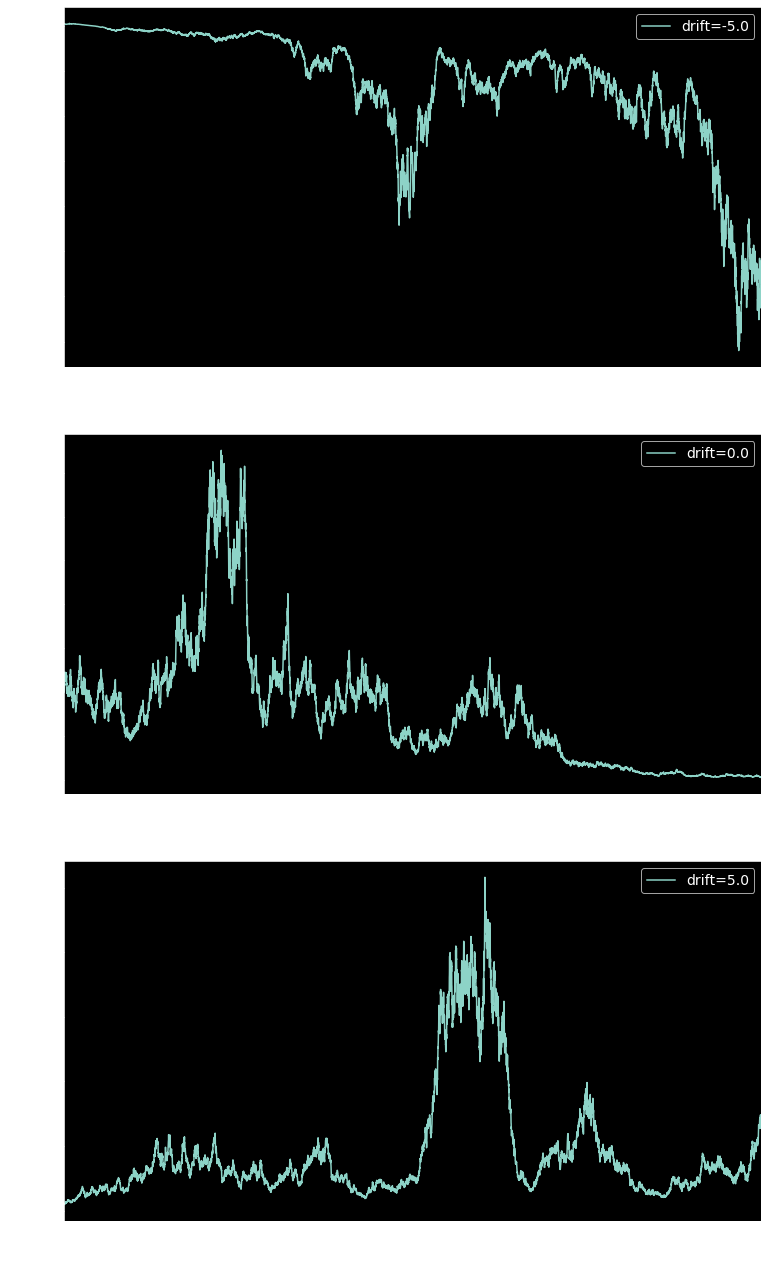

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = pseudo_GBM(x0=1, T=10, scheme_steps=SCHEME_STEPS, drift=0, vol=1)
    
for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.columns = ['drift={}'.format(drift)]
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')   

plt.tight_layout()
plt.show()

## Vasicek model

$dX_t = \lambda (\theta - X_t)dt + \sigma dW_t$

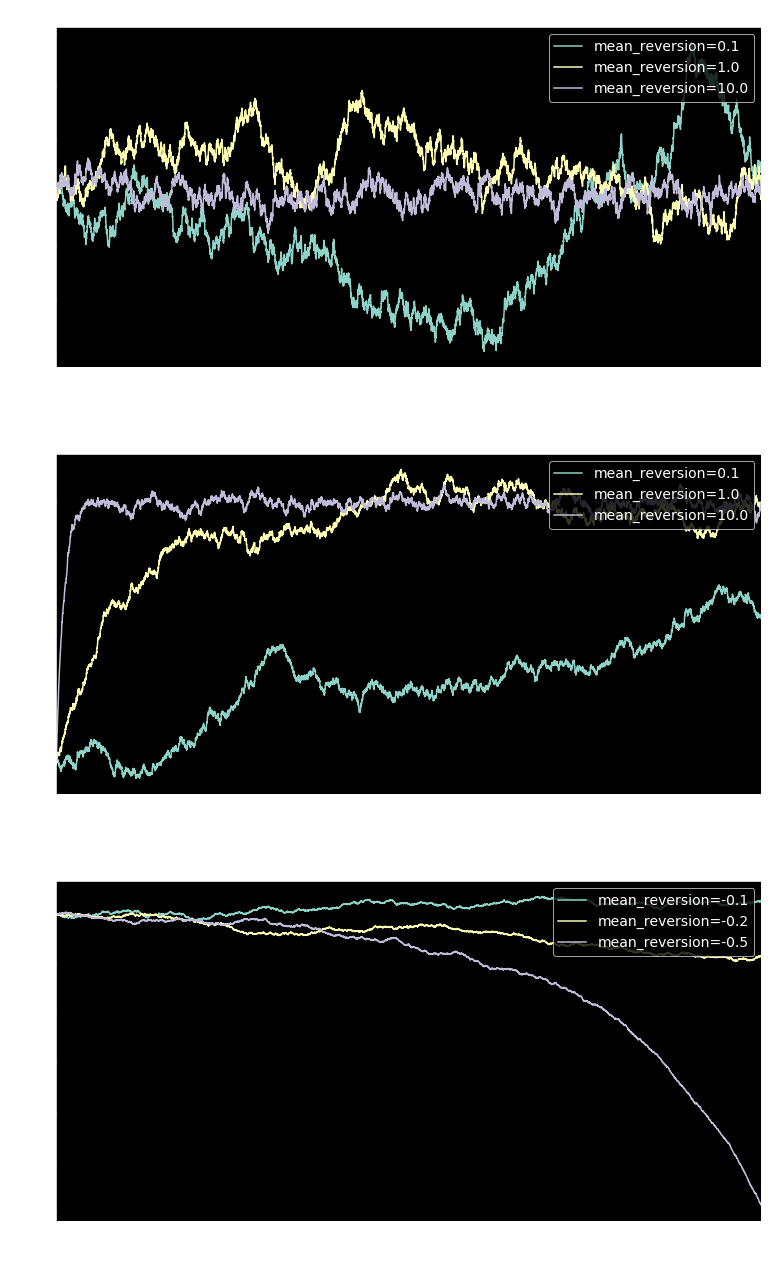

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1)

mean_reversion_sets = [
    [0.1, 1.0, 10.0],
    [0.1, 1.0, 10.0],
    [-0.1, -0.2, -0.5]
]

long_terms = [0.0, 10.0, 0]

X = Vasicek(x0=0, T=10, scheme_steps=SCHEME_STEPS, vol=1)
    
for i, ax in enumerate(axes):
    long_term = long_terms[i]
    mean_reversions = mean_reversion_sets[i]
    for mean_reversion in mean_reversions:
        X.mean_reversion = mean_reversion
        X.long_term = long_term
        df = X.simulate()
        df.columns = ['mean_reversion={}'.format(mean_reversion)]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('long_term={}'.format(long_term))
    
plt.tight_layout()
plt.show()

## CIR model
$dX_t = \lambda (\theta - X_t)dt + \sigma \sqrt{X_t} dW_t$

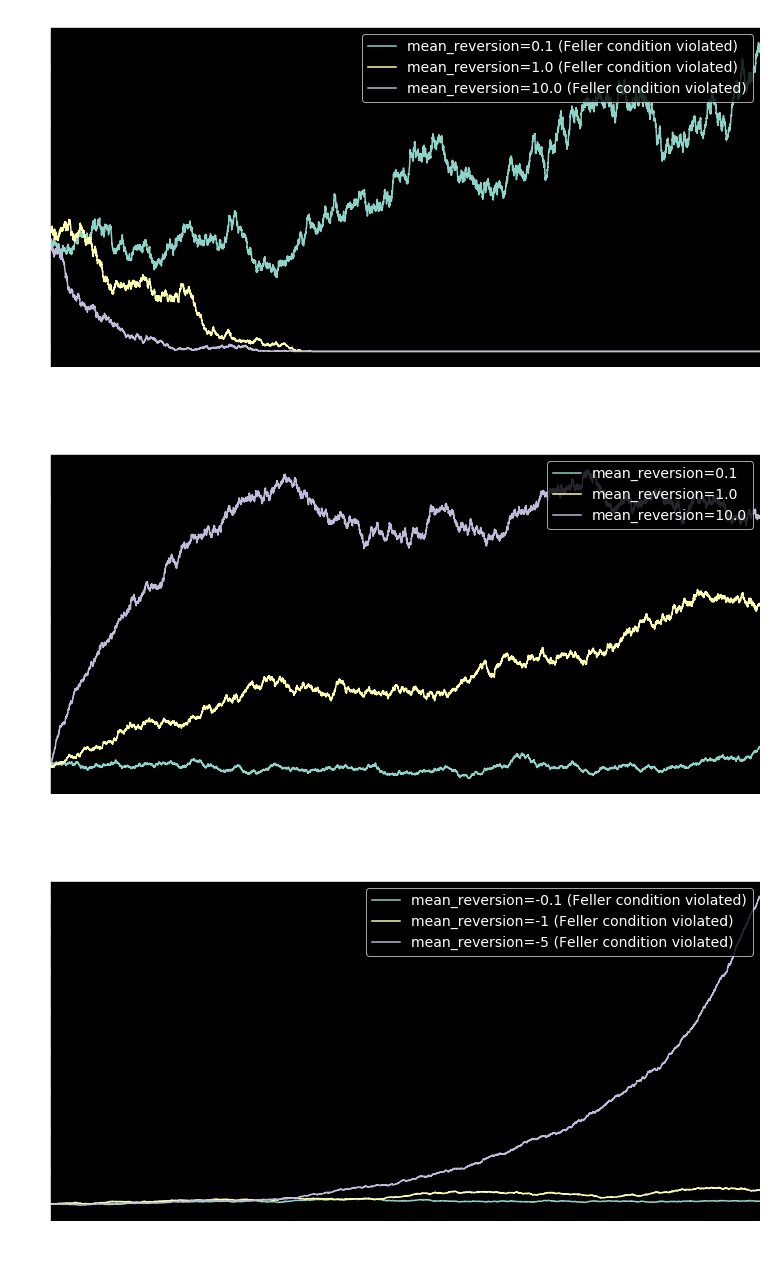

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1)

mean_reversion_sets = [
    [0.1, 1.0, 10.0],
    [0.1, 1.0, 10.0],
    [-0.1, -1, -5]
]

long_terms = [0.0, 10.0, 0.0]

# need to supply a boundary condition at zero in the case where
# the Feller condition is not met since it can then produce negative spot
# and thus imaginary square root volatility with nonzero probability
# inside the discretization scheme
X = CIR(x0=1, T=1, scheme_steps=SCHEME_STEPS, vol=1,\
            barrier=0, barrier_condition='absorb')
    
for i, ax in enumerate(axes):
    long_term = long_terms[i]
    mean_reversions = mean_reversion_sets[i]
    for mean_reversion in mean_reversions:
        X.mean_reversion = mean_reversion
        X.long_term = long_term
        df = X.simulate()
        label = 'mean_reversion={}'.format(mean_reversion)
        if not X.feller_condition:
            label += ' (Feller condition violated)'
        df.columns = [label]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('long_term={}'.format(long_term))
plt.tight_layout()
plt.show()